# Ferrofluid - Part I

## Table of Contents
1. [Introduction](#Introduction)
2. [The Model](#The-Model)
3. [Structure of this tutorial](#Structure-of-this-tutorial)
4. [Compiling ESPResSo for this Tutorial](#Compiling-ESPResSo-for-this-Tutorial)
5. [Python Version](#Python-Version)
6. [A Monolayer-Ferrofluid System in ESPResSo](#A-Monolayer-Ferrofluid-System-in-ESPResSo)
    1. [Setup](#Setup)
    2. [Sampling](#Sampling)
    3. [Sampling with animation](#Sampling-with-animation)
    4. [Sampling without animation](#Sampling-without-animation)
    5. [Cluster distribution](#Cluster-distribution)

## Introduction

Ferrofluids are colloidal suspensions of ferromagnetic single-domain particles in a liquid carrier. As the single particles contain only one magnetic domain, they can be seen as small permanent magnets. To prevent agglomeration of the particles, due to van-der-Waals or magnetic attraction, they are usually sterically or electrostatically stabilized (see fig. 1). Former is achieved by adsorption of long chain molecules onto the particle surface, latter by adsorption of charged coating particles. The size of the ferromagnetic particles are in the region of 10 nm. With the surfactant layer added they can reach a size of a few hundred nanometers. Some of the liquid properties, like the viscosity, the phase behavior or the optical birefringence can be altered via an external magnetic field or simply the fluid can be guided by such an
field. Thus ferrofluids possess a wide range of biomedical applications like  magnetic drug
targeting or magnetic thermoablation and technical applications like fine positioning systems or adaptive bearings and
dampers.
In figure 2 the picture of a ferrofluid exposed to the magnetic field of an permanent magnet is shown. The famous energy minimizing thorn-like surface is clearly visible.

<img src="figures/electrostatically_stabilised_2.svg" style="float: left; width: 49%; margin-right: 1%; margin-bottom: 2%">
<img src="figures/electrostatically_stabilised_2.svg" style="float: left; width: 49%; margin-right: 1%; margin-top: -0.05%; margin-bottom: 2%">
<p style="clear: both;">
<center>
<figcaption> Figure 1: Schematic representation of electrostatically stabilization (left) and steric stabilization (right) (source: Philip J Camp. In: Modern Problems of Molecular Physics. Springer, 2018, pp. 185–204). Here $\delta$ is the thickness of the surfactant layer $x$ the diameter of the magnetic core and $\sigma$ the effective diameter of the whole particle.

<figure>
<img src='figures/Ferrofluid_Magnet_under_glass_edit.jpg' alt='ferrofluid on glass plate under which a strong magnet is placed' style='width: 600px;'/>
<center>
<figcaption> Figure 2: Real Ferrofluid exposed to an external magnetic field (source: Wikimedia Commons)
</figure>

## The Model

<figure>
<img src='figures/ferrofluid_system_schematic_Odenbach_Collodial_Magnetic_Fluids_page_261.png' alt='schematic representation of a ferrofluid system' style='width: 300px;'/>
<center>
<figcaption> Figure 3: Schematic representation of a ferrofluid system. The small dots represent the liquid carrier and the big circles the magnetic particles with point dipole moments at their centers. $d_m$ and $d_h$ are the diameters of the magnetic core and the effective diameter respectively. (source: S. Odenbach. Colloidal Magnetic Fluids. Springer-Verlag Berlin Heidelberg, 2009)
</figure>

For simplicity in this tutorial we simulate spherical particles in a monodisperse ferrofluid system which means all particles have the same diameter $\sigma$ and dipole moment $\mu$. The point dipole moment is placed at the center of the particles and is constant both in magnitude and direction (in the coordinate system of the particle). This can be justified as the Néel relaxation times are usually negligible for the usual sizes of ferrofluid particles.
Thus the magnetic interaction potential between two single particles is the dipole-dipole interaction potential which reads

\begin{equation*}
		u_{\text{DD}}(\vec{r}_{ij}, \vec{\mu}_i, \vec{\mu}_j) = \gamma \left(\frac{\vec{\mu}_i \cdot \vec{\mu}_j}{r_{ij}^3} - 3\frac{(\vec{\mu}_i \cdot \vec{r}_{ij}) \cdot (\vec{\mu}_j \cdot \vec{r}_{ij})}{r_{ij}^5}\right)
\end{equation*}

with $\gamma = \frac{\mu_0}{4 \pi}$ and $\mu_0$ the vacuum permeability.

For the steric interaction in this tutorial we use the purely repulsive Weeks-Chandler-Andersen (WCA) potential which is a Lennard-Jones potential with cut-off radius $r_{cut}$ at the minimum of the potential $r_{cut} = r_{min} = 2^{\frac{1}{6}}\cdot \sigma$ and shifted by $\epsilon_{ij}$ such that the potential is continuous at the cut-off radius. Thus the potential has the shape

\begin{equation*}
		u_{\text{sr}}^{\text{WCA}}(r_{ij}) = \left\{
		\begin{array}{ll}
		4\varepsilon_{\text{lj}}\left[ \left( \frac{\sigma}{r_{ij}} \right)^{12} - \left( \frac{\sigma}{r_{ij}} \right)^6 \right] + \varepsilon_{\text{lj}} & r_{ij} < r_{cut} \\
		0 & r_{ij} \geq r_{cut} \\
		\end{array}
		\right.
\end{equation*}

where $r_{ij}$ are the distances between two particles.
The purely repulsive character of the potential can be justified by the fact that the particles in real ferrofluids are sterically or electrostatically stabilized against agglomeration.

The whole interaction potential reads

\begin{equation*}
		u(\vec{r}_{ij}, \vec{\mu}_i, \vec{\mu}_j) = u_{\text{sr}}(\vec{r}_{ij}) + u_{\text{DD}}(\vec{r}_{ij}, \vec{\mu}_i, \vec{\mu}_j)
\end{equation*}

The liquid carrier of the system is simulated through a Langevin thermostat.
        
For ferrofluid systems there are three important parameters. The first is the volume fraction in three dimensions or the area fraction in two dimensions or quasi two dimensions. The second is the dipolar interaction parameter $\lambda$ which is the ratio between the magnetic interaction energy at close contact and head-to-tail configuration  $\tilde{u}_{DD}$ (see fig. 4) and the thermal energy $u_{T} = k_BT$

\begin{equation}
    \lambda = \frac{\tilde{u}_{DD}}{u_T} = \gamma \frac{\mu^2}{k_BT\sigma^3}
\end{equation}

The third parameter takes a possible external magnetic field into account and is called Langevin parameter $\alpha$. It is the ratio between the energy of a dipo(le moment in the external magnetic field $B$ and the thermal energy

\begin{equation}
    \alpha = \frac{\mu_0 \mu}{k_B T}B
\end{equation}



<figure>
<img src='figures/headtotailconf.png' alt='schematic representation of head to tail configuration' style='width: 200px;'/>
<center>
<figcaption> Figure 4: Schematic representation of the head-to-tail configuration of two magnetic particles.
</figure>

## Structure of this tutorial

The aim of this tutorial is to introduce the basic features of **ESPResSo** for ferrofluids or dipolar fluids in general. In **part I** and **part II** we will do this for a monolayer-ferrofluid, in **part III** for a three dimensional system. In **part I** we will examine the clusters which are present in all interesting ferrofluid systems. In **part II** we will examine the influence of the dipole-dipole-interaction on the magnetization curve of a ferrofluid. In **part III** we calculate estimatiors for the initial susceptibility using fluctuation formulas and sample the magnetization curve.

We assume the reader is familiar with the basic concepts of Python and MD simulations.

**Remark**: The equilibration and sampling times used in this tutorial would be not sufficient for scientific  purposes, but they are long enough to get at least a qualitative insight of the behaviour of ferrofluids. They have been shortened so we achieve reasonable computation times for the purpose of a tutorial.

## Compiling ESPResSo for this Tutorial

For this tutorial the following features of **ESPResSo** are needed

```
#define EXTERNAL_FORCES

#define ROTATION

#define DIPOLES

#define LENNARD_JONES
```

Please uncomment them in the <tt>myconfig.hpp<tt> and compile **ESPResSo** using this <tt>myconfig.hpp<tt>.

## Python Version

If you are using python 2 issue the following command to activate the python 3 print syntax

In [1]:
from __future__ import print_function

## A Monolayer-Ferrofluid System in ESPResSo

For interessting ferrofluid systems, where the fraction of ferromagnetic particles in the liquid carrier and their dipole moment are not vanishingly small, the ferromagnetic particles form clusters of different shapes and sizes. If the fraction and/or dipole moments are big enought the clusters can interconnect with each other and form a whole space occuping network.
In this part we want to investigate the number of clusters as well as their shape and size in our simulated monolayer ferrofluid system. It should be noted that a monolayer is a quasi three dimensional system (q2D), i.e. two dimensional for the positions and three dimensional for the orientation of the dipole moments.

### Setup

We start with importing all necessary packages.

In [2]:
import espressomd

from espressomd.magnetostatics import DipolarP3M
from espressomd.magnetostatic_extensions import DLC

from espressomd.cluster_analysis import ClusterStructure
from espressomd.pair_criteria import DistanceCriterion


import numpy as np

Now we setting up all simulation parameters. 

In [3]:
# Lennard-Jones parameters
lj_sigma = 1
lj_epsilon = 1
lj_cut = 2**(1./6.) * lj_sigma

# Particles
N = 1000

# Area fraction of the mono-layer 
phi = 0.1

# Dipolar interaction parameter lambda = mu_0 m^2 /(4 pi sigma^3 kT)
dip_lambda = 4

# Temperature
kT =1.0

# Friction coefficient
gamma = 1.0

# Time step
dt = 0.01

Note that we declared a <tt>lj_cut</tt>. This will be used as the cut-off radius of the Lennard-Jones potential to obtain a purely repulsive WCA potential.

Now we setting up the system. The length of the simulation box is calculated using the desired area fraction and the area all particles occupy. Then we create the **ESPResSo** system and pass the simulation step. For the Verlet list skin parameter we use the build-in tuning algorithm of **ESPResSo**. After that we setting up the thermostat which is, in our case, a Langevin thermostat to simulate in an NVT ensemble. With set_random_state_PRNG() we tell the pseudo random number generator to use a random numbers every time the command is executed.

In [4]:
# System setup
box_size = (N * np.pi * (lj_sigma/2.)**2 /phi)**0.5

print("Box size",box_size)
# Note that the dipolar P3M and dipolar layer correction need a cubic
# simulation box for technical reasons.
system=espressomd.System(box_l=(box_size,box_size,box_size)) 
system.time_step=dt

# tune verlet list skin
system.cell_system.tune_skin(min_skin=0.4, max_skin=2., tol=0.2, int_steps=100)

system.thermostat.set_langevin(kT=kT,gamma=gamma)
system.set_random_state_PRNG()

Box size 88.6226925453


Now we set up the interaction between the particles as a non-bonded interaction and use the Lennard-Jones potential as the interaction potential. Here we use the above mentioned cut-off radius to get a purely repulsive interaction. 

In [5]:
# Lennard-Jones interaction
system.non_bonded_inter[0,0].lennard_jones.set_params(epsilon=lj_epsilon,sigma=lj_sigma,cutoff=lj_cut, shift="auto")

Now we generate random positions and orientations of the particles and their dipole moments.

In [6]:
# Random dipole moments
dip_phi=np.random.random((N,1)) *2. * np.pi
dip_cos_theta = 2*np.random.random((N,1)) -1
dip_sin_theta = np.sin(np.arccos(dip_cos_theta))
dip = np.hstack((
   dip_sin_theta *np.sin(dip_phi),
   dip_sin_theta *np.cos(dip_phi),
   dip_cos_theta))

# Random positions in the monolayer
pos = box_size* np.hstack((np.random.random((N,2)), np.zeros((N,1))))

Now we add the particles with their positions and orientations to our system. Thereby we activate all degrees of freedom for the orientation of the dipole moments. As we want a two dimensional system we only allow the particles to translate in x- and y-direction and not in z-direction by using the <tt>fix</tt> argument.

In [7]:
# Add particles
system.part.add(pos=pos,rotation=N*[(1,1,1)],dip=dip,fix=N*[(0,0,1)])

Be aware that we do not commit the magnitude of the magnetic dipole moments to the particles. As in our case all particles have the same dipole moment it is possible to rewrite the dipole-dipole interaction potential to

\begin{equation}
    u_{\text{DD}}(\vec{r}_{ij}, \vec{\mu}_i, \vec{\mu}_j) =  \gamma \mu^2 \left(\frac{\vec{\hat{\mu}}_i \cdot \vec{\hat{\mu}}_j}{r_{ij}^3} - 3\frac{(\vec{\hat{\mu}}_i \cdot \vec{r}_{ij}) \cdot (\vec{\hat{\mu}}_j \cdot \vec{r}_{ij})}{r_{ij}^5}\right)
\end{equation}

where $\vec{\hat{\mu}}_i$ is the unit vector of the dipole moment $i$ and $\mu$ is the magnitude of the dipole moments.
Thus we can only commit the orientation of the dipole moment to the particles and take the magnitude into account when calculating the dipole-dipole interaction with Dipolar P3M if we commit the magnitude to Dipolar P3M together with the prefactor $\gamma$ as a new prefactor


\begin{equation}
    \tilde{\gamma} = \gamma \mu^2 = \frac{\mu_0}{4\pi}\mu^2 = \lambda \sigma^3 k_BT
\end{equation}


Of course it would also be possible to commit the whole dipole moment vectors to every particle and let the prefactor of Dipolar P3M unchanged ($\gamma$). In fact we have to do this if we want to simulate polydisperse systems.

Now we choose the steeptes descent integrator to remove possible overlaps of the particles. Therefore we integrate until the energy of the whole system is lower than $5 k_BT$.

In [8]:
# Remove overlap between particles by means of the steepest descent method
system.integrator.set_steepest_descent(
    f_max=0,gamma=0.1,max_displacement=0.05)

while system.analysis.energy()["total"] > 5*kT*N:
    system.integrator.run(20)

For the simulation of our system we choose the velocity Verlet integrator

In [9]:
# Switch to velocity Verlet integrator
system.integrator.set_vv()

To calculate the dipole-dipole interaction we use the Dipolar P3M method (see Ref. [1]) which is based on the Ewald summation. At default the boundary conditions of the system are set to conducting which means the dielectric constant is set to infinity for the surrounding medium. As we want to simulate a two dimensional system we additionally use the dipolar layer correction (DLC) (see Ref. [2]). As we add <tt>DipolarP3M</tt> to our system as an actor, a tuning function is started automatically which tries to find the optimal parameters for Dipolar P3M and prints them to the screen. The last line of the output is the value of the tuned skin.

In [10]:
# Setup dipolar P3M and dipolar layer correction
dp3m = DipolarP3M(accuracy=5E-4,prefactor=dip_lambda*lj_sigma**3*kT)
dlc = DLC(maxPWerror=1E-4, gap_size=box_size-lj_sigma)
system.actors.add(dp3m)
system.actors.add(dlc)

# tune verlet list skin again
system.cell_system.tune_skin(min_skin=0.4, max_skin=2., tol=0.2, int_steps=100)

Dipolar P3M tune parameters: Accuracy goal = 5.00000e-04 prefactor = 4.00000e+00
System: box_l = 8.86227e+01 # charged part = 1000 Sum[q_i^2] = 1.00000e+03
Dmesh cao Dr_cut_iL   Dalpha_L     Derr         Drs_err    Dks_err    time [ms]
8    3   1.01422e-01 1.66347e+01 4.95712e-04 3.536e-04 3.475e-04 2       
8    2   1.06118e-01 1.52736e+01 4.98405e-04 3.536e-04 3.513e-04 1       
8    4   9.86052e-02 1.75066e+01 4.99488e-04 3.536e-04 3.528e-04 2       
8    1   1.17387e-01 1.23954e+01 4.95982e-04 3.536e-04 3.478e-04 1       
10   2   1.06118e-01 1.52736e+01 5.23167e-04 3.536e-04 3.856e-04 accuracy not achieved
10   3   1.03631e-01 1.59810e+01 4.95391e-04 3.536e-04 3.470e-04 2       
10   4   1.01144e-01 1.67190e+01 4.93793e-04 3.536e-04 3.447e-04 3       
10   5   9.94856e-02 1.72293e+01 4.96534e-04 3.536e-04 3.486e-04 3       
10   6   9.86565e-02 1.74903e+01 4.98002e-04 3.536e-04 3.507e-04 4       
12   2   1.03631e-01 1.59810e+01 5.51104e-04 3.536e-04 4.228e-04 accuracy not achieve

0.7000000000000001

Now we equilibrate the dipole-dipole interaction for some time

In [12]:
# Equilibrate
print("Equilibration...")
for i in range(30):
  system.integrator.run(1000)
  print("Dipolar energy: %.2f" % system.analysis.energy()["dipolar"])
  print("progress: {:6.2f} %".format((float(i)+1)/30 * 100))
print("Equilibration done")

Equilibration...
Dipolar energy: -3832.08
progress:   3.33 %
Dipolar energy: -4217.81
progress:   6.67 %
Dipolar energy: -4276.12
progress:  10.00 %
Dipolar energy: -4181.69
progress:  13.33 %
Dipolar energy: -4175.58
progress:  16.67 %
Dipolar energy: -4302.98
progress:  20.00 %
Dipolar energy: -4312.16
progress:  23.33 %
Dipolar energy: -4270.72
progress:  26.67 %
Dipolar energy: -4289.39
progress:  30.00 %
Dipolar energy: -4204.82
progress:  33.33 %
Dipolar energy: -4387.59
progress:  36.67 %
Dipolar energy: -4347.39
progress:  40.00 %
Dipolar energy: -4295.24
progress:  43.33 %
Dipolar energy: -4391.24
progress:  46.67 %
Dipolar energy: -4428.54
progress:  50.00 %
Dipolar energy: -4357.65
progress:  53.33 %
Dipolar energy: -4428.42
progress:  56.67 %
Dipolar energy: -4527.73
progress:  60.00 %
Dipolar energy: -4238.02
progress:  63.33 %
Dipolar energy: -4346.03
progress:  66.67 %
Dipolar energy: -4313.13
progress:  70.00 %
Dipolar energy: -4453.40
progress:  73.33 %
Dipolar energy:

As we are interested in the clustersizes and the number of clusters we now set up the cluster analysis with the distance criterion that a particle is added to a cluster if the nearest neigbors of it are closer than $1.3\cdot\sigma_{lj}$.

In [13]:
# Setup cluster analysis
cs=ClusterStructure(pair_criterion=DistanceCriterion(cut_off=1.3*lj_sigma))

## Sampling

Now we sample our system for some time and do a cluster analysis in order to get an estimator of the cluster observables.

For the cluster analysis we create two empty lists. The first for the number of clusters and the second for their sizes.

In [14]:
n_clusters = []
cluster_sizes = []

We sample over 100 loops

In [15]:
loops = 100

As the system is two dimensional, we can simply do a scatter plot to get a visual representation of a system state. To get a better insight of how a ferrofluid system develops during time we will create a video of the development of our system during the sampling. If you only want to sample the system simply go to [Sampling without animation](#Sampling-without-animation)

### Sampling with animation

To get an animation of the system development we have to create a function which will save the video and embed it in an html string.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
        plt.close(anim._fig)
    return VIDEO_TAG.format(anim._encoded_video)

animation.Animation._repr_html_ = anim_to_html

def init():
    # Set x and y range
    ax.set_ylim(0, box_size)
    ax.set_xlim(0, box_size)
    xdata, ydata = [], []
    part.set_data(xdata, ydata)
    return part,

def run(i):
    # Run cluster analysis
    cs.run_for_all_pairs()

    # Gather statistics:
    n_clusters.append(len(cs.clusters))
    for c in cs.clusters:
        cluster_sizes.append(c[1].size())
    system.integrator.run(100)

    # Save current system state as a plot
    xdata, ydata = system.part[:].pos_folded[:,0], system.part[:].pos_folded[:,1]
    ax.figure.canvas.draw()
    part.set_data(xdata, ydata)
    print("progress: {} %".format((float(i)+1)/loops * 100))
    return part,

Now we use the <tt>animation</tt> class of <tt>matplotlib</tt> to save snapshots of the system as frames of a video which is then displayed after the sampling is finished. Between two frames are 100 integration steps.

In the video chain-like and ring-like clusters should be visible which are possibly connected via Y- and X-links to each other. Some monomers should be also present.

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
part, = ax.plot([],[], 'o')

animation.FuncAnimation(fig, run, frames=loops, blit=True, interval=0, repeat=False, init_func=init)

progress: 1.0 %
progress: 2.0 %
progress: 3.0 %
progress: 4.0 %
progress: 5.0 %
progress: 6.0 %
progress: 7.0 %
progress: 8.0 %
progress: 9.0 %
progress: 10.0 %
progress: 11.0 %
progress: 12.0 %
progress: 13.0 %
progress: 14.0 %
progress: 15.0 %
progress: 16.0 %
progress: 17.0 %
progress: 18.0 %
progress: 19.0 %
progress: 20.0 %
progress: 21.0 %
progress: 22.0 %
progress: 23.0 %
progress: 24.0 %
progress: 25.0 %
progress: 26.0 %
progress: 27.0 %
progress: 28.0 %
progress: 29.0 %
progress: 30.0 %
progress: 31.0 %
progress: 32.0 %
progress: 33.0 %
progress: 34.0 %
progress: 35.0 %
progress: 36.0 %
progress: 37.0 %
progress: 38.0 %
progress: 39.0 %
progress: 40.0 %
progress: 41.0 %
progress: 42.0 %
progress: 43.0 %
progress: 44.0 %
progress: 45.0 %
progress: 46.0 %
progress: 47.0 %
progress: 48.0 %
progress: 49.0 %
progress: 50.0 %
progress: 51.0 %
progress: 52.0 %
progress: 53.0 %
progress: 54.0 %
progress: 55.0 %
progress: 56.0 %
progress: 57.0 %
progress: 58.0 %
progress: 59.0 %
progre

### Sampling without animation

The following code just samples the system and do a cluster analysis every <tt>loops</tt> (100 by default) simulation steps.

In [18]:
for i in range(loops):
    # Run cluster analysis
    cs.run_for_all_pairs()

    # Gather statistics:
    n_clusters.append(len(cs.clusters))
    for c in cs.clusters:
        cluster_sizes.append(c[1].size())
    system.integrator.run(100)
    print("progress: {} %".format((float(i)+1)/loops * 100))

progress: 1.0 %
progress: 2.0 %
progress: 3.0 %
progress: 4.0 %
progress: 5.0 %
progress: 6.0 %
progress: 7.0 %
progress: 8.0 %
progress: 9.0 %
progress: 10.0 %
progress: 11.0 %
progress: 12.0 %
progress: 13.0 %
progress: 14.0 %
progress: 15.0 %
progress: 16.0 %
progress: 17.0 %
progress: 18.0 %
progress: 19.0 %
progress: 20.0 %
progress: 21.0 %
progress: 22.0 %
progress: 23.0 %
progress: 24.0 %
progress: 25.0 %
progress: 26.0 %
progress: 27.0 %
progress: 28.0 %
progress: 29.0 %
progress: 30.0 %
progress: 31.0 %
progress: 32.0 %
progress: 33.0 %
progress: 34.0 %
progress: 35.0 %
progress: 36.0 %
progress: 37.0 %
progress: 38.0 %
progress: 39.0 %
progress: 40.0 %
progress: 41.0 %
progress: 42.0 %
progress: 43.0 %
progress: 44.0 %
progress: 45.0 %
progress: 46.0 %
progress: 47.0 %
progress: 48.0 %
progress: 49.0 %
progress: 50.0 %
progress: 51.0 %
progress: 52.0 %
progress: 53.0 %
progress: 54.0 %
progress: 55.0 %
progress: 56.0 %
progress: 57.0 %
progress: 58.0 %
progress: 59.0 %
progre

You may want to get a visualization of the current state of the system. For that we plot the particle positions folded to the simulation box using <tt>matplotlib</tt>.

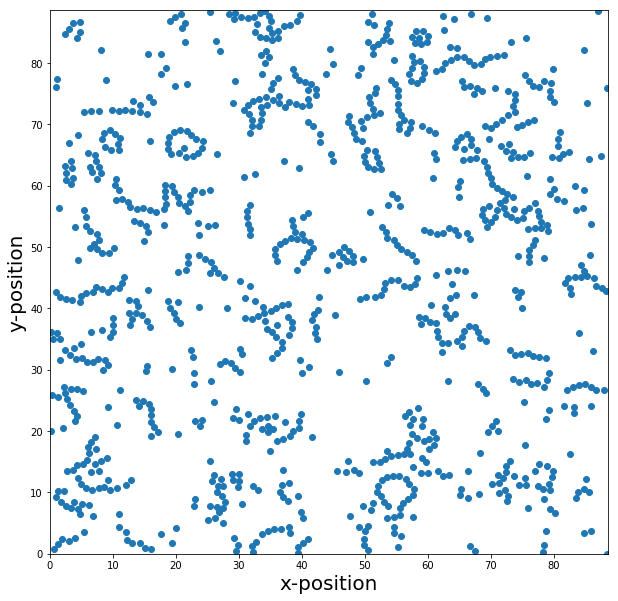

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.xlabel('x-position', fontsize=20)
plt.ylabel('y-position', fontsize=20)
plt.plot(system.part[:].pos_folded[:,0], system.part[:].pos_folded[:,1], 'o')
plt.show()


In the plot chain-like and ring-like clusters should be visible some of them connected via Y- or X-links to each other. Also some monomers should be present.

## Cluster distribution

After sampling our system for a while we now can calculate estimators for the the expectaion value of the cluster sizes and their distribution. Thus we calculate a histogram over all cluster sizes using the <tt>numpy</tt> function <tt>histogram</tt>.

<b>Note:</b> We want to get a histogram up to a cluster size of 19 particles. To not count clusters with size of 20 in our last bin (our bin for cluster size 19) we add an additional bin which we will not use in the following. This has to do with the way numpy defines the intervals between two bin edges. All but the last bin is half-open with the open border at the higher bin edge.

In [20]:
size_dist=np.histogram(cluster_sizes,range=(2,21),bins=19)

Now we can plot this histogram and should see an exponential decrease in the number of particles in a cluster along the size of a cluster, i.e. the number of monomers in a cluster

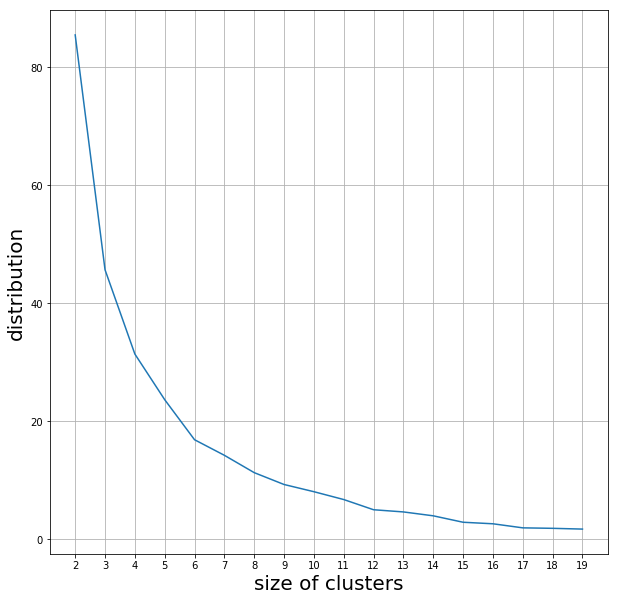

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.grid()
plt.xticks(range(0,20))
plt.plot(size_dist[1][:-2],size_dist[0][:-1]/float(loops))
plt.xlabel('size of clusters',fontsize=20)
plt.ylabel('distribution',fontsize=20)
plt.show()

[1] Juan J. Cerdà, V. Ballenegger, O. Lenz, and Ch. Holm. *P3M algorithm for dipolar interactions. *Journal of Chemical Physics, 129:234104, 2008.  
[2] A. Bródka. “Ewald summation method with electrostatic layer correction for in-
teractions of point dipoles in slab geometry”. In: Chemical Physics Letters 400.1
(2004), pp. 62–67. issn: 0009-2614. doi: https://doi.org/10.1016/j.cplett.
2004.10.086. url: http://www.sciencedirect.com/science/article/pii/S0009261404016847.